### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2(a): Column names and respective unique values in the column

In [6]:
for column in data:
    print(column + ":" + str(data[column].unique()))

destination:['No Urgent Place' 'Home' 'Work']
passanger:['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather:['Sunny' 'Rainy' 'Snowy']
temperature:[55 80 30]
time:['2PM' '10AM' '6PM' '7AM' '10PM']
coupon:['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration:['1d' '2h']
gender:['Female' 'Male']
age:['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus:['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children:[1 0]
education:['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation:['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 

2(b) Columns with null value(s) and respective null counts

In [7]:
data[data.columns[data.isnull().any()]].isnull().sum()

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

- The column "car" has over 90% null values and can be dropped from the dataset
- Columns "Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50" all have null values ranging from  1% to 2%. For these columns all the rows with null can be dropped.

In [21]:
def column_null_and_value_counts(columnName):
    print("***Column Name: " + columnName + "***")    
    print("nulls    " + str(data[columnName].isnull().sum()))
    print(data[columnName].value_counts())

print("Value Counts for columns with null values")
column_null_and_value_counts("Bar")
column_null_and_value_counts("CoffeeHouse")
column_null_and_value_counts("CarryAway")
column_null_and_value_counts("RestaurantLessThan20")
column_null_and_value_counts("Restaurant20To50")

Value Counts for columns with null values
***Column Name: Bar***
nulls    107
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64
***Column Name: CoffeeHouse***
nulls    217
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64
***Column Name: CarryAway***
nulls    151
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64
***Column Name: RestaurantLessThan20***
nulls    130
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64
***Column Name: Restaurant20To50***
nulls    189
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [13]:
total = len(data)
accepted = data["Y"].value_counts()[1]
print("Total=" + str(total) + ", Accepted=" + str(accepted) + " Proportion=" + str(round(accepted/total, 2)))

Total=12684, Accepted=7210 Proportion=0.57


5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

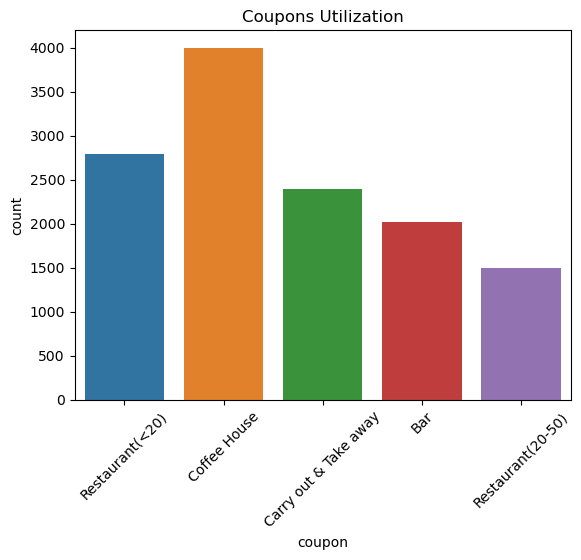

In [14]:
sns.countplot(data, x="coupon").set(title="Coupons Utilization")
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

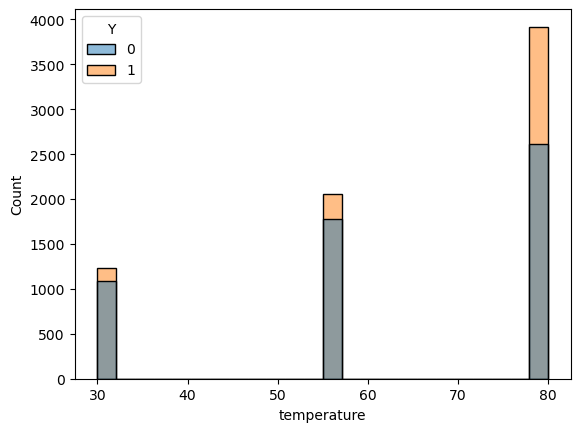

In [15]:
sns.histplot(data, x="temperature", hue="Y")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [61]:
df = data.query("coupon == 'Bar'")
df.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
6250,Home,Alone,Sunny,80,10PM,Bar,1d,Male,41,Divorced,...,4~8,1~3,1~3,less1,1,1,0,1,0,1
9136,Work,Alone,Rainy,55,7AM,Bar,1d,Female,21,Married partner,...,gt8,4~8,1~3,1~3,1,1,1,0,1,1
1206,Home,Alone,Sunny,55,6PM,Bar,1d,Female,31,Married partner,...,NaN,4~8,4~8,NaN,1,0,0,1,0,1
9300,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Male,below21,Single,...,less1,1~3,4~8,4~8,1,0,0,0,1,1
12617,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,1,0,0,1,0


In [64]:
def calc_accept_prop(desc, query_num, query_den): 
    denominator = len(df.query(query_den))
    numerator = len(df.query(query_num))
    print(desc + " - Total:" + str(denominator) + ", Accepted:" + str(numerator) + ", Proportion:" + str(round(numerator/denominator, 2)))

2. What proportion of bar coupons were accepted?


In [66]:
calc_accept_prop("Bar coupons acceptance rate", "Y==1", "Y==1 or Y==0")

Bar coupons acceptance rate - Total:2017, Accepted:827, Proportion:0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [67]:
calc_accept_prop("Acceptance: bar visit < 3",
                 "Y==1 and Bar in ('never','less1','1~3')", "Y==1")
calc_accept_prop("Acceptance: bar visit > 3",
                 "Y==1 and Bar in ('gt8','4~8')", "Y==1")

Acceptance: bar visit < 3 - Total:827, Accepted:666, Proportion:0.81
Acceptance: bar visit > 3 - Total:827, Accepted:153, Proportion:0.19


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [68]:
calc_accept_prop("Acceptance: age > 25 and bar > 1",
                 "Y==1 and Bar in ('1~3','4~8','gt8') and age in ('26','31','36','41','46','50plus')", 
                 "Y==1")
calc_accept_prop("Acceptance: All others",
                 "Y==1 and (Bar not in ('1~3','4~8','gt8') or age not in ('26','31','36','41','46','50plus'))", 
                 "Y==1")

Acceptance: age > 25 and bar > 1 - Total:827, Accepted:292, Proportion:0.35
Acceptance: All others - Total:827, Accepted:535, Proportion:0.65


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [69]:
calc_accept_prop("Acceptance: bar > 1, no kids, no farming, fishing, forestry", 
                 "Y==1 and Bar in ('1~3','4~8','gt8') and passanger != 'Kid(s)' and occupation not in ('fishing','farming', 'forestry')", 
                 "Y==1")
calc_accept_prop("Acceptance: All others",
                 "Y==1 and (Bar not in ('1~3','4~8','gt8') or passanger == 'Kid(s)' or occupation in ('fishing','farming', 'forestry'))",
                 "Y==1")

Acceptance: bar > 1, no kids, no farming, fishing, forestry - Total:827, Accepted:393, Proportion:0.48
Acceptance: All others - Total:827, Accepted:434, Proportion:0.52


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [70]:
calc_accept_prop("Acceptance: bar > 1 and no kids and not widowed",
                 "Y==1 and Bar in ('1~3','4~8','gt8') and passanger != 'Kid(s)' and maritalStatus != 'Widowed'", 
                 "Y==1")
calc_accept_prop("Acceptance: bar > 1 and under 30",
                 "Y==1 and Bar in ('1~3','4~8','gt8') and age in ('26', '21','below21')", 
                 "Y==1")
calc_accept_prop("Acceptance: cheap restaurants > 4 and income < 50K",
                 "Y==1 and RestaurantLessThan20 in ('4~8','gt8') and income in ('$12500 - $24999','$25000 - $37499','Less than $12500')", 
                 "Y==1")

Acceptance: bar > 1 and no kids and not widowed - Total:827, Accepted:393, Proportion:0.48
Acceptance: bar > 1 and under 30 - Total:827, Accepted:249, Proportion:0.3
Acceptance: cheap restaurants > 4 and income < 50K - Total:827, Accepted:108, Proportion:0.13


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

- People are likely to visit bar in general, if they get a coupon (41% acceptance)
- People who visit bar occassionaly (<3 / mo) are more likely to accept the bar coupon
- People without accompanying Kids are more likely to accept the bar coupon
- People not widowed are more likely to accept the bar coupon
- Low income people are less likely to accept the bar coupon

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Investigating the Coffee House Coupons
1. Dataframe with records related to Coffee House coupon

In [93]:
df = data.query("coupon == 'Coffee House'")
df.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
3768,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,41,Married partner,...,4~8,4~8,4~8,1~3,1,1,0,0,1,0
6313,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,31,Married partner,...,4~8,4~8,1~3,never,1,1,1,0,1,0
3691,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,26,Unmarried partner,...,1~3,less1,1~3,never,1,0,0,0,1,1
6858,Home,Alone,Snowy,30,6PM,Coffee House,1d,Female,46,Married partner,...,never,less1,less1,never,1,1,0,1,0,0
2990,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Unmarried partner,...,4~8,gt8,4~8,less1,1,0,0,0,1,0


2. What proportion of bar coupons were accepted?

In [73]:
calc_accept_prop("Coffee House coupons acceptance rate", "Y==1", "Y==1 or Y==0")

Coffee House coupons acceptance rate - Total:3996, Accepted:1995, Proportion:0.5


3. Does weather played a role in decision making?

In [74]:
calc_accept_prop("Acceptance: temp  < 60",
                 "Y==1 and temperature < 60", 
                 "Y==1")
calc_accept_prop("Acceptance: temp > 60",
                 "Y==1 and temperature > 60", 
                 "Y==1")

Acceptance: temp  < 60 - Total:1995, Accepted:723, Proportion:0.36
Acceptance: temp > 60 - Total:1995, Accepted:1272, Proportion:0.64


4. Which gender is more likely to buy coffee?

In [75]:
calc_accept_prop("Acceptance: gender male",
                 "Y==1 and gender == 'Male'", 
                 "Y==1")
calc_accept_prop("Acceptance: gender female",
                 "Y==1 and gender == 'Female'", 
                 "Y==1")

Acceptance: gender male - Total:1995, Accepted:985, Proportion:0.49
Acceptance: gender female - Total:1995, Accepted:1010, Proportion:0.51


5. Do people prefer morning or evening time to buy coffee?

In [77]:
#time:['2PM' '10AM' '6PM' '7AM' '10PM']'
calc_accept_prop("Acceptance: time before evening",
                 "Y==1 and time in ['2PM','10AM','7AM']", 
                 "Y==1")
calc_accept_prop("Acceptance: time after evening",
                 "Y==1 and time in ['6PM', '10PM']", 
                 "Y==1")

Acceptance: time before evening - Total:1995, Accepted:1418, Proportion:0.71
Acceptance: time after evening - Total:1995, Accepted:577, Proportion:0.29


6. Do higher income people when travelling with companions are more likely to avail coffee coupon?

In [92]:
calc_accept_prop("Acceptance: Alone with income < 50K",
                 "Y==1 and passanger=='Alone' and income in ('$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500')", 
                 "Y==1")
calc_accept_prop("Acceptance: vs others",
                 "Y==1 and (passanger!='Alone' or income in ('$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500'))", 
                 "Y==1")

Acceptance: Alone with income < 50K - Total:1995, Accepted:571, Proportion:0.29
Acceptance: vs others - Total:1995, Accepted:1578, Proportion:0.79


- People are likely to buy coofee, if they get a coupon (50% acceptance)
- People will more likely to buy coffee when temperature is above 55
- Gender does not effect the decision
- Coffee coupon are very much likely to be utilized in morning and afternoon
- High income people (>50K) are highly likely to avail coupon when not alone